## Introdução :

Com o intuito de criar um algoritmo que simule um APND(Autômato de pilha não determinístico),este que diferentemente do AFND,tem seu poder computacional elevado a um novo nível, podendo reconhecer linguagens antes não reconhecidas pelos AF.Isso só é possível, graças a pilha que foi adicionada ao autômato,característica esta que dá nome,criando assim uma memória, onde é possível realizar operações de entrada e saída de dados.

## Projeto e Implementação do Algoritmo :

O corpo principal do algoritmo utiliza a estrutura de dados de uma pilha para gerenciar o que é processado.Assim nesta pilha é colocado as próximas iterações ao percorrer o autômato,sendo adicionado a essa pilha cada configuração instantânea a ser processada,fazendo uso da tupla, os seguintes dados são adicionado à pilha:Estado Atual,Palavra restante,stack atual do autômato.

Desta forma podemos gerenciar o não determinismo, pois a cada novo caminho encontrado, um novo processo é adicionado na pilha com suas novas configurações para serem consumidas.Por conseguinte, o primeiro processo que conseguir chegar às condições de parada(pilha vazia e estado final) faz com que todo o resto pare de ser processado,evitando assim processamento desnecessário.

Para o automato, foram utilizados Grafo e Tabela Hash, onde foi utilizando a representação por matriz de adjacências, foram salvos as configurações instantâneas para cada estado do autômato,de forma que dado o estado atual e o caractere atual da palavra, podemos obter facilmente os próximos caminhos disponíveis.


## Metodologia :

Para o desenvolvimento desse projeto a metodologia utilizada foi o TDD(Test Driven Development).Assim, primeiramente criamos os testes com alguns APND e seus resultados esperados e partimos para a implementação do algoritmo.

O código em primeiro momento foi baseado no AFND feito anteriormente, contudo com alguns testes,algumas refatorações foram feitas,tornando o código atual uma versão distinta da que foi baseada.

Nossa estrutura de testes foi baseada em testes unitários, fazendo uso da biblioteca já presente no python(unittest).Tornando nossos testes reutilizáveis, podendo ser aplicados a qualquer algoritmo que simule um APND,sendo necessário poucas modificações para uso.

Visto a necessidade de manter as modificações do projeto controladas foi utilizado o sistema de versionamento git.Assim, sendo hospedado no Github,uma das maiores plataformas de hospedagem de código-fonte,para ser possível sua utilização por futuros estudantes.

## Resultados e Conclusões :

Iremos realizar um testes empírico para determinar aproximadamente o tempo de execução do algoritmo que foi criado, para isso iremos utilizar a seguinte linguagem :

L={a^n b^n | n>=0}

Onde pára o tamanho n será realizado uma variação de 1 a 1000 para que possamos analisar o comportamento deste, assim:

Faremos a importação de algumas funções ja presentes no arquivo index(presente neste [repositorio](https://github.com/Paul0Cesar/LFA/tree/main/APND)),pois estas funções não vão ser modificadas para a realização do nosso teste.Importamos tambem a biblioteca time,pois está será necessaria para mensurar o tempo de início e fim do processamento de cada palavra,Logo:

In [35]:
from index import Graph, verify_lambda_ways, process, verify_word
import time

Diferente das outras funções, a função start será refeita,pois será necessário coletar o tempo de início e fim de cada palavra, ficando da seguinte maneira:

In [36]:
def start(states, alphabet, stack_alphabet, edges, start_state, end_state_List, words):
    graph = Graph(states)
    graph.set_edges(edges)
    result = []
    time_result = []
    for word in words:
        start_time = time.time()
        result.append(verify_word(
            graph, word, start_state, set(end_state_List)))
        end_time = time.time()
        time_result.append(end_time-start_time)

    return result, time_result


Neste próximo passo estamos criando a estrutura de nosso APND, iremos usar 5 palavras inicialmente para validar se o funcionamento está dentro do esperado, assim:

In [37]:
states = ["0", "1"]
alphabet = ["a", "b"]
stack_alphabet = ["A"]
edges = [('0', 'a', "*", "0", 'A'), ('0', 'b', 'A',
                                     "1", "*"), ('1', 'b', "A", '1', "*")]
start_state = "0"
end_state_list = ['1']

words = ["*", "ab", "aabb", "abb", "aab"]
expected = ["N", "S", "S", "N", "N"]

test1,test_time1 = start(states, alphabet, stack_alphabet, edges,
               start_state, end_state_list, words)

print("System Calibrated:", test1 == expected)

System Calibrated: True


Assim, sabemos que nosso APND está funcionando como deveria.Por conseguinte iremos criar um loop para criar as palavras com variados tamanhos de n,logo:

In [38]:
words = []
word_sizes = []
for n in range(1, 1000):
    word = ''.join("a" for i in range(n))+''.join("b" for i in range(n))
    words.append(word)
    word_sizes.append(n)

test2, test_time= start(states, alphabet, stack_alphabet, edges,
                          start_state, end_state_list, words)

Em posse dos resultados, iremos agora usar a biblioteca matplotlib para plotar um gráfico do tamanho de n em relação ao tempo de processamento, assim:

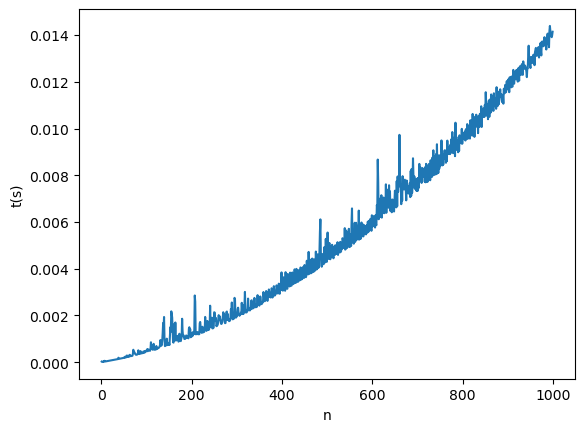

In [39]:
import matplotlib.pyplot as plt

plt.xlabel('n')
plt.ylabel('t(s)')
plt.plot(word_sizes, test_time)

Podemos observar no gráfico que dado o aumento de n o tempo tambem vem a aumentar.Com o objetivo de prever o tempo de processamento para qualquer palavra de tamanho n,faremos a seguir uma regressão linear utilizando a biblioteca scikit-learn,assim:

In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


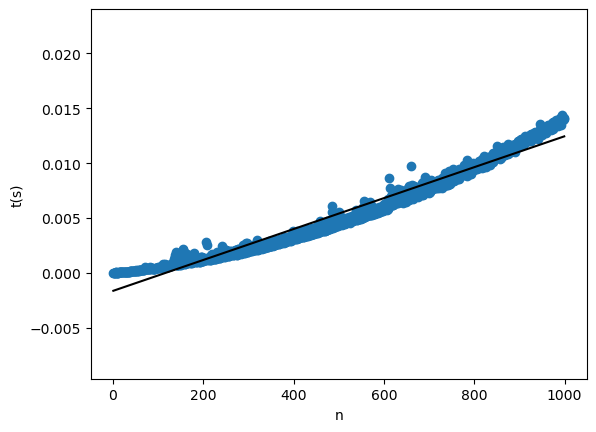

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
x=np.array(list(zip(word_sizes)))
y=np.array(test_time)
model.fit(x,y)

plt.xlabel('n')
plt.ylabel('t(s)')
plt.scatter(x, test_time)
plt.plot(x, model.predict(x),color="black")

Sabemos que uma reta tem sua equação geral dada por :f(x)=Ax+C , assim coletando os dados obtidos na regressão temos:

In [42]:
a=model.coef_[0]
c=model.intercept_
print("A:",a)
print("C:",c)
f = lambda n : a*n + c
print("f(1000000)=",f(1000000),"s")

A: 1.4096935443039897e-05
C: -0.0016368373239562467
f(1000000)= 14.095298605715941 s


Assim, como feito no código anterior,se tivéssemos uma palavra com n com valor de 1000000 teríamos um tempo aproximado de 14 segundos de processamento.Este valor não é absoluto, pois pode mudar de acordo com as configurações do computador onde o algoritmo for executado.